In [ ]:
import pandas as pd
import pymongo
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px


In [ ]:
mongo = pymongo.MongoClient("mongodb://localhost:27017")
mydb = mongo["AirBnB"]
mycollection = mydb['NYC']

In [ ]:
#Reading directly from CSV
df = pd.read_csv(r"C:\Users\user\Desktop\VSCode\AirBnB - EDA\AB_NYC_2019.csv")
df

In [ ]:
#Reading from MongoDB
df = pd.DataFrame(list(mycollection.find()))
df

In [ ]:
filtered_df = df

### Data Description & Information

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
neighbourhood_group_df = ('Select a neighbourhood_group',sorted(df.neighbourhood_group.unique()))

#### TRying new method

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df[df["neighbourhood_group"].isin(neighbourhood_group_df)]
df2

In [ ]:
host_areas =host_neighbourhood.groupby(by=['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

In [ ]:
fig = px.bar(host_areas.head(), x='host_name', y='calculated_host_listings_count',
             labels={'calculated_host_listings_count': 'Count'},
             title='Top 5 Hosts with Highest Calculated Host Listings Count')
fig.show()

In [ ]:
fig = px.scatter(filtered_df, x='host_name', y='calculated_host_listings_count', color='neighbourhood_group',
                 title='Calculated Host Listings Count by Host Name and Neighbourhood Group',
                 labels={'calculated_host_listings_count': 'Count', 'host_name': 'Host Name'})
fig.show()

In [ ]:
fig = px.bar(host_areas, x='host_name', y='calculated_host_listings_count', color='calculated_host_listings_count',
             labels={'calculated_host_listings_count': 'Count'},
             title='Calculated Host Listings Count by Host Name and Neighbourhood Group')
fig.show()

In [132]:
area_reviews = filtered_df.groupby(by=['neighbourhood_group'], as_index=False)['number_of_reviews'].max()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [124]:
area_reviews = filtered_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [133]:
fig = px.bar(area_reviews, x='neighbourhood_group', y='number_of_reviews', 
             title='Number of Reviews by Neighbourhood Group',
             labels={'number_of_reviews': 'Number of Reviews', 'neighbourhood_group': 'Neighbourhood Group'})
fig.show()

In [ ]:
#st.subheader(":rainbow[Reviews_neighbourhood_group_ViewData]")
fig = px.pie(filtered_df, values="price", names="neighbourhood_group", hole=0.5)
fig.update_traces(text=filtered_df["neighbourhood_group"], textposition="outside")
fig.show()
#st.plotly_chart(fig, use_container_width=True) 

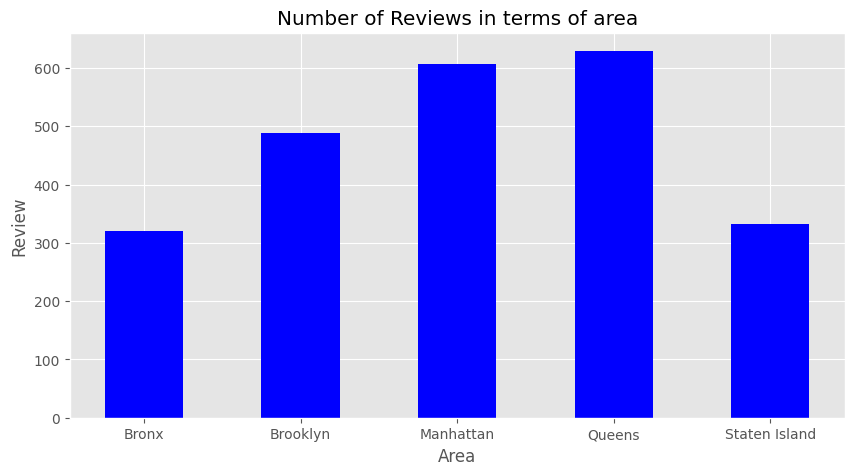

In [126]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))

plt.bar(area, review, color ="blue", width =0.5)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()

In [123]:
room_type_df = filtered_df.groupby(by=["room_type"], as_index=False)["price"].sum()
room_type_df

,room_type,price
0,Entire home/apt,5381480
1,Private room,2004450
2,Shared room,81348


In [121]:
room_price_area_wise = df.groupby(['neighbourhood_group','room_type'])['price'].sum().reset_index()
room_price_area_wise.sort_values(by='price', ascending=False).head(10)

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,3289707
3,Brooklyn,Entire home/apt,1704633
7,Manhattan,Private room,932111
4,Brooklyn,Private room,775099
9,Queens,Entire home/apt,308218
10,Queens,Private room,241983
0,Bronx,Entire home/apt,48325
1,Bronx,Private room,43546
8,Manhattan,Shared room,42709
12,Staten Island,Entire home/apt,30597


### End

In [ ]:
room_type_df = filtered_df.groupby(by=["room_type"], as_index=False)["price"].sum()
room_type_df

In [ ]:
fig = px.bar(room_type_df,title="Room_type in the Neighbourhood and Neighbourhood_Group wise Price", x="room_type", y="price", text=['${:,.2f}'.format(x) for x in room_type_df["price"]],
                 template="seaborn")
fig.show()

In [ ]:
df.drop(['_id','latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)

In [ ]:
neighbourhood_group_df = ('Select a neighbourhood_group',sorted(df.neighbourhood_group.unique()))
neighbourhood_group_df

In [ ]:
neighbourhood_df = ('Select neighbourhood',sorted(df.neighbourhood.unique()))
neighbourhood_df

In [ ]:
room_df = ('Select Room_type',sorted(df.room_type.unique()))
room_df

In [ ]:
price_df =('Select Price',df.price.min(),df.price.max(),(df.price.min(),df.price.max()))
price_df

In [ ]:
r = df.groupby(by=["room_type"], as_index=False)["price"].sum()
r

In [ ]:
query1 = f'neighbourhood_group in {neighbourhood_group_df} & room_type in {room_df} & neighbourhood in {neighbourhood_df} & price >= {price_df[1]} & price <= {price_df[2]}'
query1

In [ ]:
from scipy.stats import skew
df['reviews_per_month'].skew()

In [ ]:
# iqr method
q1 = df.reviews_per_month.quantile(0.25)
q3 = df.reviews_per_month.quantile(0.75)

iqr = q3-q1
iqr

In [ ]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.reviews_per_month<lower) | (df.reviews_per_month>upper)][['reviews_per_month']].head()

In [ ]:
df_iqr_transformed = df[(df.reviews_per_month>lower) & (df.reviews_per_month<upper)]

In [ ]:
sns.histplot(data=df_iqr_transformed, x=df_iqr_transformed['reviews_per_month'], kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(8,8), dpi=100)

df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .sum() \
                                .reset_index(name='Total_price')

plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        pctdistance=1.2,
        labeldistance=1.3,
        autopct='%.2f %%')

plt.title('Total Price Distribution in NYC', loc="left")

plt.show()

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="neighbourhood_group", 
                size="price",
                sizes=(5,300),
                data=df)
# Add labels and title
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Location of listings")

# Show plot
plt.show()

### Dropping Unnecessary Values and Columns 

In [ ]:
df.isna().sum()

In [ ]:
df.drop(['_id','latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max()
df.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

In [ ]:
ax = df['neighbourhood'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 neighbourhoods with max no. of listings')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')

In [ ]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10).index.tolist()

df_top_neighbourhoods = df.loc[df['neighbourhood'].isin(top_neighbourhoods)]

# Group the data by 'neighbourhood' and 'neighbourhood_group' and calculate the count
listings_counts = df_top_neighbourhoods.groupby(
    ['neighbourhood', 'neighbourhood_group']).size().reset_index(name='count')

listings_counts.sort_values(by='count', ascending=False, inplace=True)

listings_counts

In [ ]:
room_types = df['room_type'].unique()

no_of_listings = []
for i in room_types:
    no_of_listings.append(
    df.loc[df['room_type'] == i,
          'room_type'].value_counts().iloc[0])
    

plt.title('Distribution of room types')

plt.pie(no_of_listings, labels=room_types, pctdistance=0.8,autopct='%.2f %%')
plt.show()

In [ ]:
df.columns

In [ ]:
df

### 1. What can we learn about different hosts and areas?

In [ ]:
host_areas =df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head()

### We find that Host name Sonder(NYC) has listed highest number of listings in Manhattan followed by Blueground

### 2.What we learn from room type and their prices according to area?

In [ ]:
room_price_area_wise = df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price',ascending=False).head(10)

In [ ]:
neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {} #Create a dictionary named room_dict to store the count of each room type. Loop through the room_type list and increase the count of the room type in the dictionary if it already exists. If not, add the room type as a key with the count as 1.

for i in room_type:
    room_dict[i] = room_dict.get(i, 0) + 1

plt.bar(room_dict.keys(), room_dict.values(), color='green', edgecolor='blue') #Plot a bar graph using the plt.bar function. The x-axis will be the room types which are the keys of the room_dict dictionary and the y-axis will be the count of each room type which are the values of the room_dict dictionary.
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

### We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

### 3.What can we learn from Data? (ex: locations, prices, reviews, etc)

In [ ]:
area_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

In [ ]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))

plt.bar(area, review, color ="blue", width =0.5)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()

In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

In [ ]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

## From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas

### 4.Which hosts are the busiest and why is the reason?

In [ ]:
busy_hosts = df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

In [ ]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()

### We have found Busiest hosts :
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

### Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

### 5. Which Hosts are charging higher price?

In [ ]:
Highest_price= df.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

In [ ]:
name_of_host = Highest_price ['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge , color ='orange', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()

### Now we have seen that 10 Hosts who are charging maximum price:
### Jelena, Kathrine, Erin, Matt, Olson, Amy, Rum, Jessica, Sally, Jack

### Max Price is 10000 USD

### 6. What is the room count in overall NYC according to the listing of room types?

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

In [ ]:
## Group the data by 'host_id' and calculate the average of price
df_listings_by_Hosts = df.groupby(['host_id', 
                                   'neighbourhood_group', 
                                   'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings_by_Hosts.head()

In [ ]:
# all original data
ax = sns.scatterplot(x='calculated_host_listings_count', 
                y='Average_price',
                hue='neighbourhood_group',
                data=df_listings_by_Hosts)
ax.set_title("Calculated_host_listing_count Vs. Average price")
plt.show()

In [ ]:
plt.figure(figsize=(8,8), dpi=100)

df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .sum() \
                                .reset_index(name='Total_price')

plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        pctdistance=1.2,
        labeldistance=1.3,
        autopct='%.2f %%')

plt.title('Total Price Distribution in NYC', loc="left")

plt.show()

### Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.
### Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.
### We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types

Conclusion:
1.We find that Host name Sonder(NYC) has listed highest number of listings in Manhattan followed by Blueground.

2.We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

3.From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas.

4.We have found Busiest hosts : Dona, Ji, Maya,Carol,Danielle

5.Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

6.Now we have seen that 10 Hosts who are charging maximum price: Jelena,Kathrine,Erin,Matt,Olson,Amy,Rum,Jessica,Sally & Jack
Max Price is 10000 USD

7.From this visualization We found that most of the people likely to stay at Entire home and Private room which are present in Manhattan, Brooklyn & Queens and also vistors referring stay in room which listing price is less.

8.Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens. We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.